In [1]:
using JuMP
using Gurobi
import HiGHS

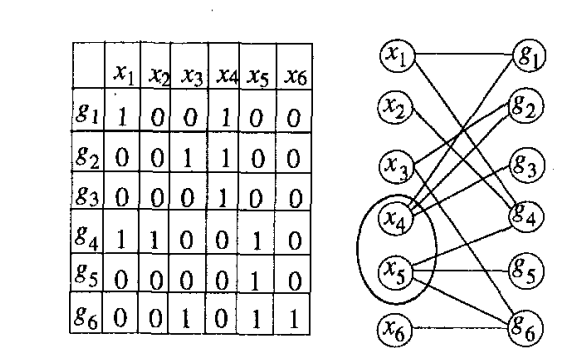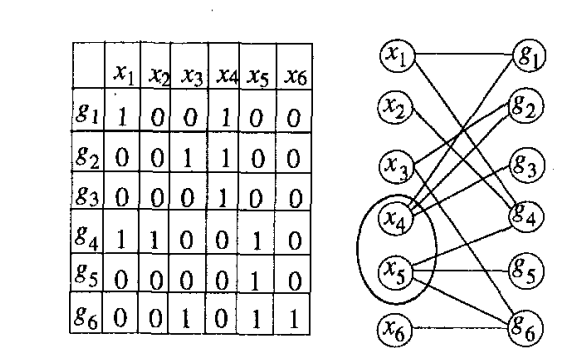

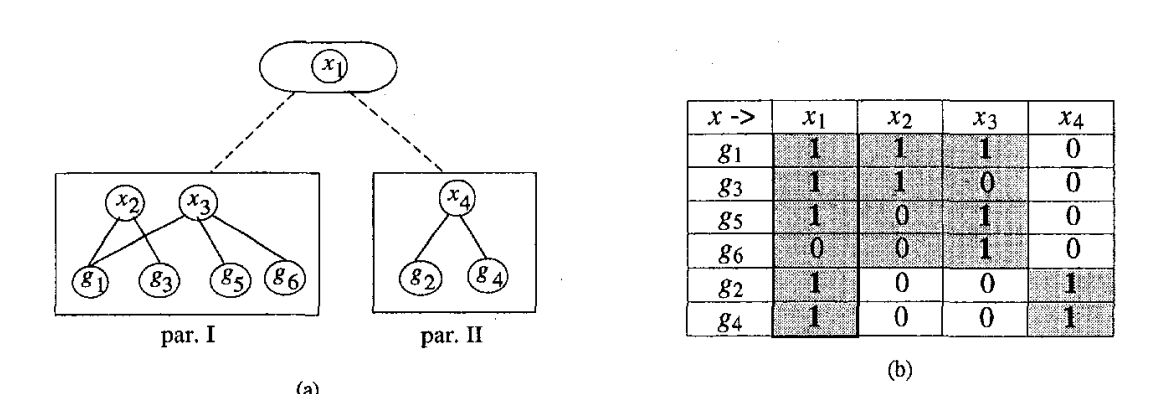

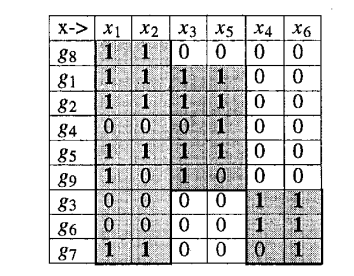

Optimal Hierarchical Decomposition Synthesis Using Integer Programming 

In [2]:
G = [(1,1),(1,4),(2,3),(2,4),(3,4),(4,1),(4,2),(4,5),(5,5),(6,3),(6,5),(6,6)];

In [3]:
g = Dict(1=>[1,4],2=>[3,4],3=>[4],4=>[1,2,5],5=>[5],6=>[3,5,6])
#g = Dict(1=>[1,2,3],2=>[1,4],3=>[1,2],4=>[1,4])#,5=>[1,3],6=>[3])
g = Dict(1=>[1,2,3,5],2=>[1,2,3,5],3=>[4,6],4=>[5],5=>[1,2,3,5],6=>[4,6],7=>[1,2,6],8=>[1,2],9=>[1,3])

Dict{Int64, Vector{Int64}} with 9 entries:
  5 => [1, 2, 3, 5]
  4 => [5]
  6 => [4, 6]
  7 => [1, 2, 6]
  2 => [1, 2, 3, 5]
  9 => [1, 3]
  8 => [1, 2]
  3 => [4, 6]
  1 => [1, 2, 3, 5]

In [4]:
model = Model(Gurobi.Optimizer)
#model = Model(HiGHS.Optimizer)
m = length(g)
n = 6
K = 2
@variable(model, x[1:n,1:2], Bin)
@variable(model, 0<=y[1:n,1:m,1:2]<=1)
@variable(model, ym[1:n])
@variable(model, z[1:m,1:2], Bin)
@variable(model, zm[1:m],Bin)
@variable(model, s[1:2])
@variable(model, smax)
@variable(model, smin)
@constraint(model, c[j=1:m,k=1:2], sum([x[i,k]+y[i,j,k] for i in g[j]]) == length(g[j])*z[j,k]);
@constraint(model, c1[j=1:m], sum([ym[i] for i in g[j]]) <= length(g[j])-1+zm[j]);
@constraint(model, c2[j=1:m], sum([ym[i] for i in g[j]]) >= zm[j]);
@constraint(model, d[i=1:n], sum(x[i,:])+ym[i]==1)
@constraint(model, d2[i=1:n], y[i,:,:] .<= ym[i])
@constraint(model, e1[i=1:2], sum(x[:,i]) >= 1)
@constraint(model, e2[i=1:2], sum(z[:,i]) >= 1)
@constraint(model, f[i=1:m], sum(z[i,:])+zm[i]==1)
@constraint(model, fmax[i=1:2], sum(z[:,i]) <= s[i])
@constraint(model, s .<= smax)
@constraint(model, smin .<= s)
@constraint(model, smax <= 2*smin)
@objective(model, Min, sum(ym)+sum(s)+sum(zm)/K)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-02-25


ym[1] + ym[2] + ym[3] + ym[4] + ym[5] + ym[6] + s[1] + s[2] + 0.5 zm[1] + 0.5 zm[2] + 0.5 zm[3] + 0.5 zm[4] + 0.5 zm[5] + 0.5 zm[6] + 0.5 zm[7] + 0.5 zm[8] + 0.5 zm[9]

In [5]:
#show(model)

In [6]:
optimize!(model)

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 170 rows, 157 columns and 501 nonzeros
Model fingerprint: 0xbb3662d5
Variable types: 118 continuous, 39 integer (39 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Presolve removed 86 rows and 77 columns
Presolve time: 0.00s
Presolved: 84 rows, 80 columns, 367 nonzeros
Variable types: 49 continuous, 31 integer (31 binary)
Found heuristic solution: objective 11.5000000

Root relaxation: objective 9.750000e+00, 50 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    9.75000    0   18   11.50000    9.75000  15.2%     -    0s
H    0     0                      10.5000

In [7]:
[value.(z) value.(zm)]

9×3 Matrix{Float64}:
 1.0  0.0   0.0
 1.0  0.0  -0.0
 0.0  1.0   0.0
 1.0  0.0   0.0
 1.0  0.0   0.0
 0.0  1.0  -0.0
 0.0  1.0   0.0
 0.0  0.0   1.0
 1.0  0.0   0.0

In [8]:
[value.(x) value.(ym)]

6×3 Matrix{Float64}:
 -0.0  -0.0  1.0
 -0.0   0.0  1.0
  1.0  -0.0  0.0
 -0.0   1.0  0.0
  1.0  -0.0  0.0
 -0.0   1.0  0.0

In [9]:
value(smin),value(smax)

(3.0, 6.0)